# Gasoline Engine Development Trends in The Automotive Industry
## By Can Yesilkaya </font>

.............. Need to fill here

Import required libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as st
import statsmodels.api as sm

## Data Wrangling
### Gatherin Data

In [2]:
df = pd.read_csv('database.csv', index_col='Vehicle ID');

/Users/macc/opt/anaconda3/envs/udacity_env/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (7,16,62,64,65,67,68,78) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Assessing Data

In [3]:
df.head()

,Year,Make,Model,Class,Drive,Transmission,Transmission Descriptor,Engine Index,Engine Descriptor,Engine Cylinders,...,Hours to Charge (AC 240V),Composite City MPG,Composite Highway MPG,Composite Combined MPG,Range (FT1),City Range (FT1),Highway Range (FT1),Range (FT2),City Range (FT2),Highway Range (FT2)
Vehicle ID,,,,,,,,,,,,,,,,,,,,,
26587,1984,Alfa Romeo,GT V6 2.5,Minicompact Cars,NaN,Manual 5-Speed,NaN,9001,(FFS),6.0,...,0.0,0,0,0,0,0.0,0.0,NaN,0.0,0.0
27705,1984,Alfa Romeo,GT V6 2.5,Minicompact Cars,NaN,Manual 5-Speed,NaN,9005,(FFS) CA model,6.0,...,0.0,0,0,0,0,0.0,0.0,NaN,0.0,0.0
26561,1984,Alfa Romeo,Spider Veloce 2000,Two Seaters,NaN,Manual 5-Speed,NaN,9002,(FFS),4.0,...,0.0,0,0,0,0,0.0,0.0,NaN,0.0,0.0
27681,1984,Alfa Romeo,Spider Veloce 2000,Two Seaters,NaN,Manual 5-Speed,NaN,9006,(FFS) CA model,4.0,...,0.0,0,0,0,0,0.0,0.0,NaN,0.0,0.0
27550,1984,AM General,DJ Po Vehicle 2WD,Special Purpose Vehicle 2WD,2-Wheel Drive,Automatic 3-Speed,NaN,1830,(FFS),4.0,...,0.0,0,0,0,0,0.0,0.0,NaN,0.0,0.0


In [4]:
df['Fuel Type 1'].unique()

array(['Regular Gasoline', 'Diesel', 'Premium Gasoline', 'Natural Gas',
       'Electricity', 'Midgrade Gasoline'], dtype=object)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38113 entries, 26587 to 37687
Data columns (total 80 columns):
Year                                   38113 non-null int64
Make                                   38113 non-null object
Model                                  38113 non-null object
Class                                  38113 non-null object
Drive                                  36924 non-null object
Transmission                           38102 non-null object
Transmission Descriptor                15045 non-null object
Engine Index                           38113 non-null int64
Engine Descriptor                      22693 non-null object
Engine Cylinders                       37977 non-null float64
Engine Displacement                    37979 non-null float64
Turbocharger                           5239 non-null object
Supercharger                           693 non-null object
Fuel Type                              38113 non-null object
Fuel Type 1                         

In [6]:
df.describe()

,Year,Engine Index,Engine Cylinders,Engine Displacement,City MPG (FT1),Unrounded City MPG (FT1),City MPG (FT2),Unrounded City MPG (FT2),City Gasoline Consumption (CD),City Electricity Consumption,...,Hours to Charge (240V),Hours to Charge (AC 240V),Composite City MPG,Composite Highway MPG,Composite Combined MPG,Range (FT1),City Range (FT1),Highway Range (FT1),City Range (FT2),Highway Range (FT2)
count,38113.000000,38113.000000,37977.000000,37979.000000,38113.000000,38113.000000,38113.000000,38113.000000,38113.000000,38113.000000,...,38113.000000,38113.000000,38113.000000,38113.000000,38113.000000,38113.000000,38113.000000,38113.000000,38113.000000,38113.000000
mean,2000.194527,8799.389001,5.736656,3.317583,17.981109,4.606426,0.546218,0.386633,0.000432,0.205802,...,0.027635,0.005549,0.082203,0.080891,0.081311,0.469708,0.426249,0.419197,0.043973,0.040051
std,10.464573,17781.058490,1.752254,1.361995,6.849728,10.113963,4.109282,3.861179,0.039976,3.043951,...,0.473685,0.161014,2.156682,2.052187,2.097794,9.352069,9.104702,9.315914,1.311628,1.169281
min,1984.000000,0.000000,2.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1991.000000,0.000000,4.000000,2.200000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2001.000000,212.000000,6.000000,3.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2009.000000,4451.000000,6.000000,4.300000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2017.000000,69102.000000,16.000000,8.400000,150.000000,150.000000,145.000000,145.083500,5.350000,122.000000,...,12.000000,7.000000,97.000000,81.000000,88.000000,315.000000,305.900000,346.900000,103.030000,90.550000


In [7]:
df[['Year', 'Make', 'Model', 'Transmission', 'Engine Cylinders', 'Engine Displacement', 'Tailpipe CO2 in Grams/Mile (FT1)']].head(5)

,Year,Make,Model,Transmission,Engine Cylinders,Engine Displacement,Tailpipe CO2 in Grams/Mile (FT1)
Vehicle ID,,,,,,,
26587,1984,Alfa Romeo,GT V6 2.5,Manual 5-Speed,6.0,2.5,444.350000
27705,1984,Alfa Romeo,GT V6 2.5,Manual 5-Speed,6.0,2.5,444.350000
26561,1984,Alfa Romeo,Spider Veloce 2000,Manual 5-Speed,4.0,2.0,423.190476
27681,1984,Alfa Romeo,Spider Veloce 2000,Manual 5-Speed,4.0,2.0,423.190476
27550,1984,AM General,DJ Po Vehicle 2WD,Automatic 3-Speed,4.0,2.5,522.764706


In [8]:
df['Fuel Type 1'].unique()
#Fuel Type 1
#Fuel Type 2     

array(['Regular Gasoline', 'Diesel', 'Premium Gasoline', 'Natural Gas',
       'Electricity', 'Midgrade Gasoline'], dtype=object)

<b>Issues need fixing</b><br>
- Year is int64 needs to be converted to string
- Vehicle with same specs have been tested twice. Introduces bias in data due to duplication of some specs.
- Need to encode Fuel type 1 column
- Turbocharger and Supercharger columns need to be converted to a new column forced induction

### Cleaning

In [9]:
df_clean = df[['Year', 'Make', 'Model', 'Transmission', 'Engine Cylinders', 'Engine Displacement', 
              'Tailpipe CO2 in Grams/Mile (FT1)', 'Fuel Type 1', 'Turbocharger', 'Supercharger']].copy()

- year is int64 needs to be converted to string<br>
    Cast .astype(str) method on the column and replace the original with this new column

In [10]:
df_clean['Year'] = df_clean['Year'].astype(str)

test the output by printing the datatype of the new collumn using dtype property

In [11]:
print(df_clean['Year'].dtypes)

object


- Vehicle with same specs have been tested twice. Introduces bias in data due to duplication of some specs.

In [12]:
df_dummy = df_clean[['Year', 'Make', 'Model', 'Transmission', 'Engine Cylinders', 'Engine Displacement', 'Tailpipe CO2 in Grams/Mile (FT1)']].copy()

In [13]:
df_clean.drop(df_dummy[df_dummy.duplicated()].index, axis=0, inplace=True)

In [14]:
df_clean.head()

,Year,Make,Model,Transmission,Engine Cylinders,Engine Displacement,Tailpipe CO2 in Grams/Mile (FT1),Fuel Type 1,Turbocharger,Supercharger
Vehicle ID,,,,,,,,,,
26587,1984,Alfa Romeo,GT V6 2.5,Manual 5-Speed,6.0,2.5,444.350000,Regular Gasoline,NaN,NaN
26561,1984,Alfa Romeo,Spider Veloce 2000,Manual 5-Speed,4.0,2.0,423.190476,Regular Gasoline,NaN,NaN
27550,1984,AM General,DJ Po Vehicle 2WD,Automatic 3-Speed,4.0,2.5,522.764706,Regular Gasoline,NaN,NaN
27549,1984,AM General,FJ8c Post Office,Automatic 3-Speed,6.0,4.2,683.615385,Regular Gasoline,NaN,NaN
27593,1984,American Motors Corporation,Eagle 4WD,Automatic 3-Speed,6.0,4.2,522.764706,Regular Gasoline,NaN,NaN


- Need to encode Fuel type 1 column<br>
pd.get_dummies can be used for this process

In [15]:
df_clean = pd.concat([df_clean, pd.get_dummies(df_clean['Fuel Type 1'])], axis=1)

- Turbocharger and Supercharger columns need to be converted to a new column forced induction<br>


In [16]:
df_clean['Forced_Induction'] = (df_clean['Turbocharger']=='T') | (df_clean['Supercharger']=='S')

In [17]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36106 entries, 26587 to 37687
Data columns (total 17 columns):
Year                                36106 non-null object
Make                                36106 non-null object
Model                               36106 non-null object
Transmission                        36095 non-null object
Engine Cylinders                    35974 non-null float64
Engine Displacement                 35976 non-null float64
Tailpipe CO2 in Grams/Mile (FT1)    36106 non-null float64
Fuel Type 1                         36106 non-null object
Turbocharger                        5019 non-null object
Supercharger                        686 non-null object
Diesel                              36106 non-null uint8
Electricity                         36106 non-null uint8
Midgrade Gasoline                   36106 non-null uint8
Natural Gas                         36106 non-null uint8
Premium Gasoline                    36106 non-null uint8
Regular Gasoline      

## Analysis of The Data
### Q1: How did the engine evolve?

In [18]:
Gasoline_df = df_clean[(df_clean['Midgrade Gasoline'] | df_clean['Premium Gasoline'] | df_clean['Regular Gasoline'])==True]

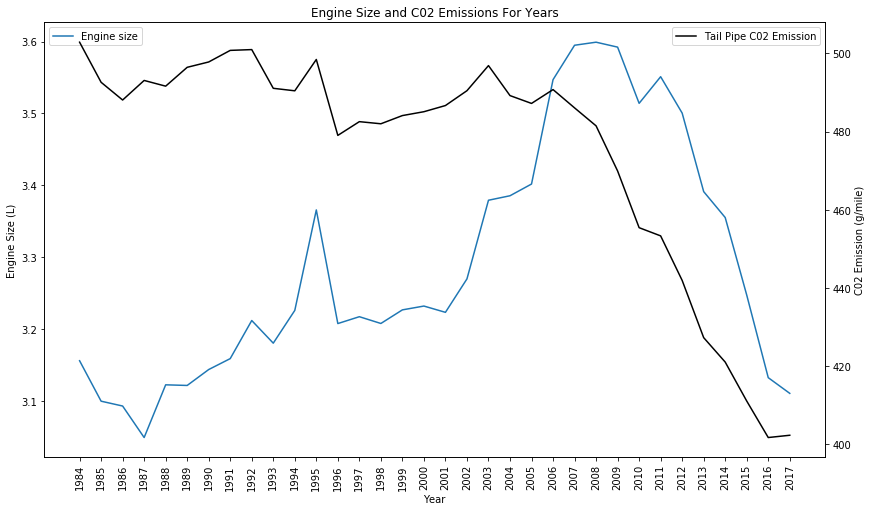

In [19]:
base_color = sns.color_palette()[0]
plt.figure(figsize=(14,8))
ax1 = sns.lineplot(data=Gasoline_df, x='Year', y='Engine Displacement', ci=None, color=base_color, label='Engine size')
plt.xticks(rotation=90)
ax2 = ax1.twinx()
sns.lineplot(data=Gasoline_df, x='Year', y='Tailpipe CO2 in Grams/Mile (FT1)', ci=None, color='k', ax=ax2, label='Tail Pipe C02 Emission')
ax2.legend(loc='upper right')
ax2.set_ylabel('C02 Emission (g/mile)')
ax1.legend(loc='upper left')
ax1.set_ylabel('Engine Size (L)')
plt.title('Engine Size and C02 Emissions For Years')
plt.savefig('plots/EngineSize_C02_vsYear.png', bbox_inches='tight')
plt.show()

The average engine size has grown until 2006. It is observed that with the drop in tailpipe C02 emissions the engine size began to shirnk as well. 

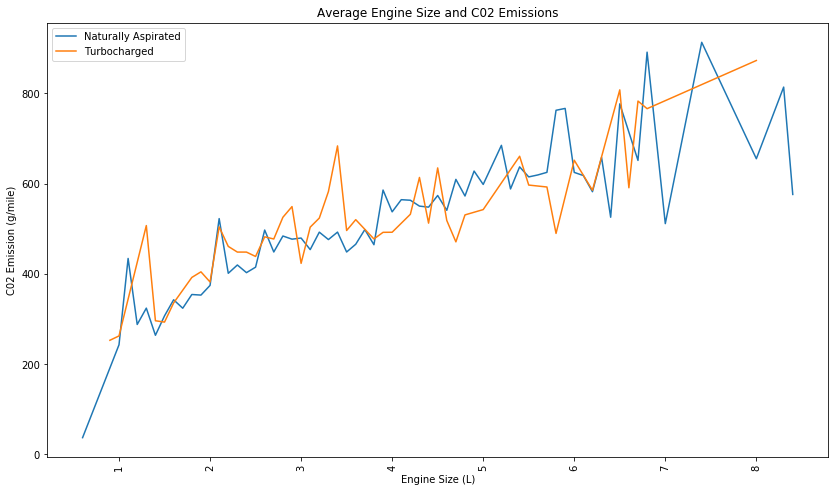

In [20]:
base_color = sns.color_palette()[0]
plt.figure(figsize=(14,8))
ax1 = sns.lineplot(data=Gasoline_df, x='Engine Displacement', y='Tailpipe CO2 in Grams/Mile (FT1)', hue='Forced_Induction', ci=None)
plt.legend(('Naturally Aspirated', 'Turbocharged'), loc='upper left')
plt.xticks(rotation=90)
plt.title('Average Engine Size and C02 Emissions')
ax1.set_ylabel('C02 Emission (g/mile)')
ax1.set_xlabel('Engine Size (L)')
plt.savefig('plots/Average_Engine_Size_C02_Emissions', bbox_inches='tight')
plt.show()

There is seen to be a linear relationship with engine size and CO2 emissions, whether it is turbo charged or not.

### Q2: Is Turbocharging Good for C02 Emissions?

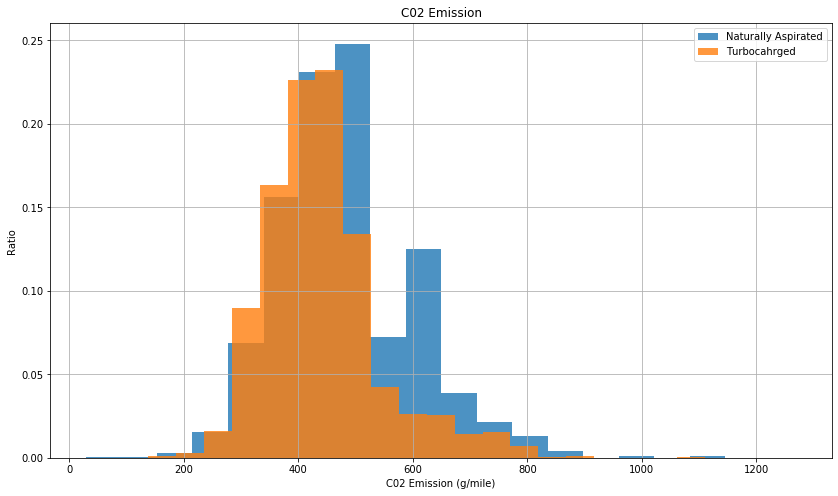

In [21]:
weights1 = np.ones(Gasoline_df[Gasoline_df['Forced_Induction']==False].shape[0]) / Gasoline_df[Gasoline_df['Forced_Induction']==False].shape[0]
weights2 = np.ones(Gasoline_df[Gasoline_df['Forced_Induction']==True].shape[0]) / Gasoline_df[Gasoline_df['Forced_Induction']==True].shape[0]
ax1 = Gasoline_df[Gasoline_df['Forced_Induction']==False].hist('Tailpipe CO2 in Grams/Mile (FT1)', weights=weights1, bins=20, label='Naturally Aspirated', alpha=0.8, figsize=(14,8))
Gasoline_df[Gasoline_df['Forced_Induction']==True].hist('Tailpipe CO2 in Grams/Mile (FT1)', weights=weights2, bins=20, ax=ax1, label='Turbocahrged', alpha=0.8)
plt.legend()
plt.ylabel('Ratio')
plt.xlabel('C02 Emission (g/mile)')
plt.title('C02 Emission')
plt.savefig('plots/C02_Emission_distribution.png', bbox_inches='tight')
plt.show()

In [22]:
n_force = Gasoline_df[Gasoline_df['Forced_Induction']==True].shape[0]
n_natural = Gasoline_df[Gasoline_df['Forced_Induction']==False].shape[0]
boots_Forced = []
for _ in range(10000):
    mean_forced = Gasoline_df[Gasoline_df['Forced_Induction']==True].sample(n_force, replace=True)['Tailpipe CO2 in Grams/Mile (FT1)'].mean()
    mean_natural = Gasoline_df[Gasoline_df['Forced_Induction']==False].sample(n_natural, replace=True)['Tailpipe CO2 in Grams/Mile (FT1)'].mean()
    boots_Forced.append(mean_natural-mean_forced)

diff_forced = Gasoline_df[Gasoline_df['Forced_Induction']==False]['Tailpipe CO2 in Grams/Mile (FT1)'].mean() - Gasoline_df[Gasoline_df['Forced_Induction']==True]['Tailpipe CO2 in Grams/Mile (FT1)'].mean()

$H_{0}$         $\mu_{natural}$ - $\mu_{turbocharged}$ $\leq$ 0  
$H_{alt}$       $\mu_{natural}$ - $\mu_{turbocharged}$ $\gt$ 0  

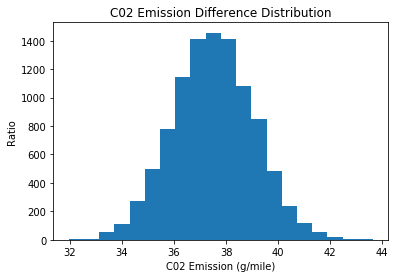

In [23]:
plt.hist(boots_Forced, bins=20)
plt.ylabel('Ratio')
plt.xlabel('C02 Emission (g/mile)')
plt.title('C02 Emission Difference Distribution')
plt.show()

In [24]:
boots_Forced = np.array(boots_Forced)
#p_diff_data = df2[df2['group']=='treatment']['converted'].mean() - df2[df2['group']=='control']['converted'].mean()
p_val = st.norm.cdf(0, loc = boots_Forced.mean(), scale = np.std(boots_Forced))
print('p-value', p_val)

p-value 2.3724563390340158e-129


The p value is zero thus stating there is high statistical evidence to reject the null hypothesis. Therefore we can state that turbocharged engines will produce less C02 emissions on a statistical basis.

In [25]:
print('Turbocharged mean C02', Gasoline_df[Gasoline_df['Forced_Induction']==True]['Tailpipe CO2 in Grams/Mile (FT1)'].mean())
print('Naturally aspirated mean C02', Gasoline_df[Gasoline_df['Forced_Induction']==False]['Tailpipe CO2 in Grams/Mile (FT1)'].mean())

Turbocharged mean C02 441.81610275578294
Naturally aspirated mean C02 479.300620604394


However turbo charged engine data shows a right skewed distribution which indicates that there is a affect of turbocharging on C02 emissions.

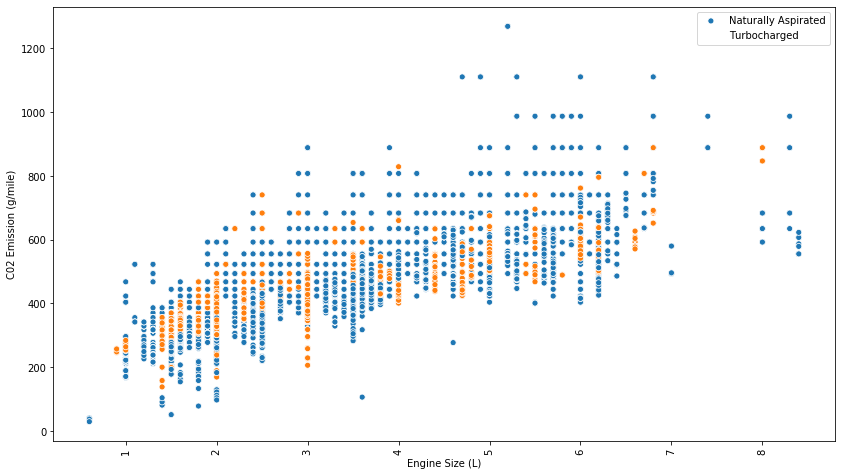

In [26]:
plt.figure(figsize=(14,8))
sns.scatterplot(data=Gasoline_df, x='Engine Displacement', y='Tailpipe CO2 in Grams/Mile (FT1)', hue='Forced_Induction')
plt.xticks(rotation=90)
plt.legend(('Naturally Aspirated', 'Turbocharged'), loc='upper right')
plt.title('')
plt.ylabel('C02 Emission (g/mile)')
plt.xlabel('Engine Size (L)')
plt.show()

It can be seen that engines with size higher then 3L the turbocharging does reduce C02 emissions. However whith engines lower then 3L there is not a significant seperation between turbocharged engines and naturally aspirated engines.

### Q3: What Is The Effect Of Transmission Type on C02 Emissions?

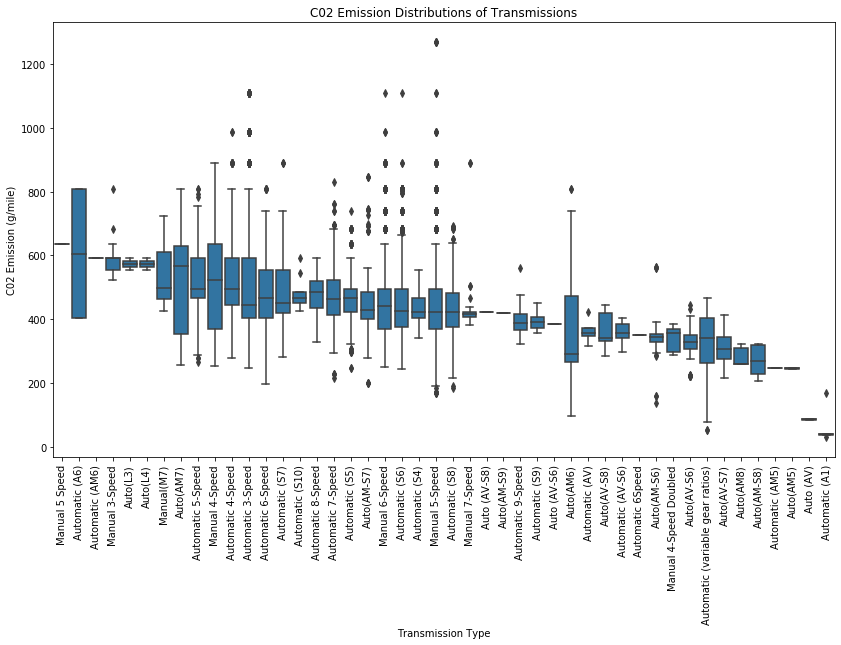

In [27]:
sorted_index = Gasoline_df.groupby('Transmission')['Tailpipe CO2 in Grams/Mile (FT1)'].mean().sort_values(ascending=False).index
plt.figure(figsize=(14,8))
sns.boxplot(data=Gasoline_df, x='Transmission', y='Tailpipe CO2 in Grams/Mile (FT1)', order=sorted_index, color=base_color)
plt.xticks(rotation=90)
plt.title('C02 Emission Distributions of Transmissions')
plt.ylabel('C02 Emission (g/mile)')
plt.xlabel('Transmission Type')
plt.savefig('plots/C02_Emission_Distributions_Transmissions.png', bbox_inches='tight')
plt.show()

Lowest C02 emissions are seen to be provided by automatic transmissions. As a second finding manual transmissions are found with high C02 emissions.

### Q4: Prediction of C02 Emissions